# Problem 3-3: Kleinberg Network Model
Submission from Maria Kagkeli, Maria Regina Lily, Mihai Verzan

In [1]:
import igraph as ig
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean


## 1. Generate Kleinberg Random Network

In [4]:
def point_2D(x, l):
    return x//l, x-(x//l)*l

def kleinberg(l,a):
    #create lattice netwrok with l^2 nodes
    G = ig.Graph.Lattice([l,l], circular=False)  
    
    #try to add link for every node x
    for x in range(l*l):
        
        #create a list of all possible target nodes 
        non_x = [i for i in range(0,l*l)]
        del(non_x[x])
        
        #convert x to 2D points so that we can calculate the euclidean distance
        point_x = (x//l, x-(x//l)*l)
        points_y = [point_2D(i,l) for i in non_x ]      
         
        #calculate probability that node x is linked with the target nodes y
        #formula given by the question
        dist = np.array([euclidean(point_x, point_y) for point_y in points_y])
        C_x = np.sum(dist**(-a))
        P_x = (1/C_x)*(dist**(-a))
        
        #create a weighted list of choice, weight of node y is p_x(y)
        choice = []
        for i in range(len(non_x)): 
            weight = int(P_x[i]*10000)
            choice = choice + [non_x[i]]*(weight) 
            
        #choose a random target node y from choice
        y = random.choice(choice)
            
        #add link (x,y) to graph if it doesn't already exist
        existing_edges = G.get_edgelist()
        if (x,y) not in existing_edges and (y,x) not in existing_edges:
            #print("add new link {}".format((x,y)))
            G.add_edge(x,y)
        
    return G

### Set up values for experiment

In [5]:
L = [ 2,5,7,10,12,15,18,20,25,28,30,32 ]
N = [l*l for l in L]

G_0 = [kleinberg(l,0) for l in L]
G_1 = [kleinberg(l,1) for l in L]
G_2 = [kleinberg(l,2) for l in L]
G_3 = [kleinberg(l,3) for l in L]
G_4 = [kleinberg(l,4) for l in L]
G_5 = [kleinberg(l,5) for l in L]


## 2. Average Shortest Path Length

In [6]:
avg_dist0 = [np.sum(G_0[i].shortest_paths())/L[i]**4 for i in range(len(L))]
avg_dist1 = [np.sum(G_1[i].shortest_paths())/L[i]**4 for i in range(len(L))]
avg_dist2 = [np.sum(G_2[i].shortest_paths())/L[i]**4 for i in range(len(L))]
avg_dist3 = [np.sum(G_3[i].shortest_paths())/L[i]**4 for i in range(len(L))]
avg_dist4 = [np.sum(G_4[i].shortest_paths())/L[i]**4 for i in range(len(L))]
avg_dist5 = [np.sum(G_5[i].shortest_paths())/L[i]**4 for i in range(len(L))]

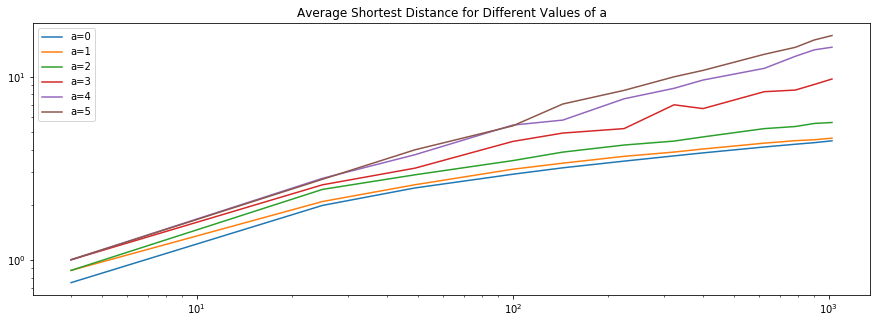

In [15]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
fig.set_figwidth(15)
fig.set_figheight(5)

plt.plot(N, avg_dist0)
plt.plot(N, avg_dist1)
plt.plot(N, avg_dist2)
plt.plot(N, avg_dist3)
plt.plot(N, avg_dist4)
plt.plot(N, avg_dist5)

ax.legend(["a=0","a=1", "a=2", "a=3", "a=4", "a=5"])
plt.title("Average Shortest Distance for Different Values of a")
plt.show()

### 3. Discussion 
For higher values of a (a=4, a=5), the average shortest distance $<d(N)>$ grows approximately proportional to $log(N)$. This means, the Kleinberg model generates networks with small-world-behaviour for higher values of a

## 4. Average Local Clustering Coefficient

In [8]:
avg_lcc0 = [g.transitivity_avglocal_undirected() for g in G_0]
avg_lcc1 = [g.transitivity_avglocal_undirected() for g in G_1] 
avg_lcc2 = [g.transitivity_avglocal_undirected() for g in G_2]
avg_lcc3 = [g.transitivity_avglocal_undirected() for g in G_3]
avg_lcc4 = [g.transitivity_avglocal_undirected() for g in G_4]
avg_lcc5 = [g.transitivity_avglocal_undirected() for g in G_5]


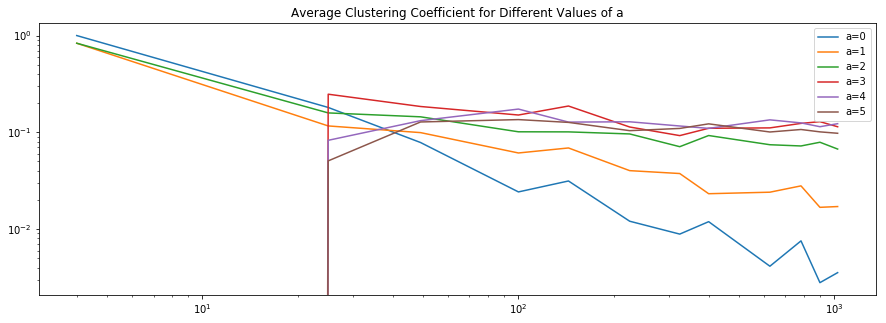

In [16]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
fig.set_figwidth(15)
fig.set_figheight(5)

plt.plot(N, avg_lcc0)
plt.plot(N, avg_lcc1)
plt.plot(N, avg_lcc2)
plt.plot(N, avg_lcc3)
plt.plot(N, avg_lcc4)
plt.plot(N, avg_lcc5)

ax.legend(["a=0","a=1", "a=2", "a=3", "a=4", "a=5"])
plt.title("Average Clustering Coefficient for Different Values of a")
plt.show()

We can see here that the average clustering coefficient for the lower values of $\alpha$, ($\alpha$ = 0,1,2), the average clustering coefficient is inversely proportional to the $log(N)$ 

For the higher values of $\alpha$, ($\alpha$ = 5,4,3), the average clustering coefficient increase significantly between $N=10$ and $N=100$. But generally, the average clustering coefficient stays rather low for higher values $\alpha$. 

This reflects the weighted random selection of the extra link that would be added to each node. The neighbors $y$ of a node $x$ would have the distance $d(x,y) = 1$, which would give these neighbors the highest chances of being picked as target node of the extra link. As a result, the chances of the graph actually getting new links for high values of $\alpha$ is rather small. If no new link is created, then the average clustering coefficient would be 0, or near to 0.
(As we found in the previous assignment, a grid-like lattice network has the average clustering coefficient of 0)